Loading the Indian Election dataset containing 2263 records and printing the first and last 5 records

In [302]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
file_path ="C:\\Users\\ASUS\\Desktop\\LS_2.0.csv"
df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


In [303]:
a=df.isnull().mean()
b=df.dtypes
result = pd.concat([a, b], axis=1)
result.columns = ['Missing percentages', 'Data Type']

print(result)

                                           Missing percentages Data Type
STATE                                                 0.000000    object
CONSTITUENCY                                          0.000000    object
NAME                                                  0.000000    object
WINNER                                                0.000000     int64
PARTY                                                 0.000000    object
SYMBOL                                                0.108263    object
GENDER                                                0.108263    object
CRIMINAL\nCASES                                       0.108263    object
AGE                                                   0.108263   float64
CATEGORY                                              0.108263    object
EDUCATION                                             0.108263    object
ASSETS                                                0.108263    object
LIABILITIES                                        

We find that "NOTA" is not a good attribute so we deleted all the records containing NOTA, so all the missing values are deleted using complete case analysis (CCA)

In [304]:
total_rows_with_NOTA = (df['NAME'] == 'NOTA').sum()
print("Records containing 'NOTA' in the 'NAME' column:" ,total_rows_with_NOTA)

df_new = df[df['NAME'] != 'NOTA']

total_rows_with_NOTA_filtered = (df_new['NAME'] == 'NOTA').sum()
print("New dataset records containing 'NOTA' in the 'NAME' column:", total_rows_with_NOTA_filtered)

Records containing 'NOTA' in the 'NAME' column: 245
New dataset records containing 'NOTA' in the 'NAME' column: 0


In [305]:
df_new

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,YAVATMAL-WASHIM,Vaishali Sudhakar Yede,0,PHJSP,Whistle,FEMALE,0,28.0,GENERAL,10th Pass,"Rs 11,68,500\n ~ 11 Lacs+","Rs 9,000\n ~ 9 Thou+",20563,57,20620,1.076097,1.755157,1916185
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666


Comparision of graphs before and removing records containing "NOTA"

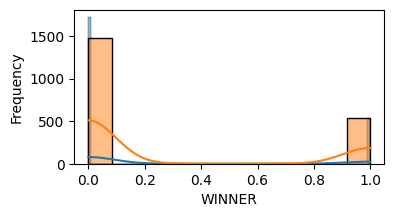

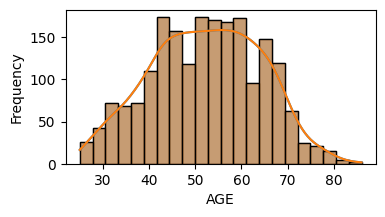

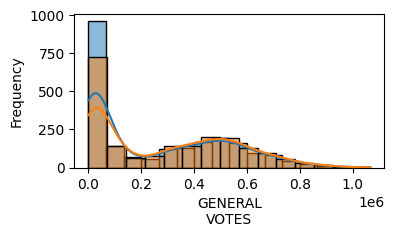

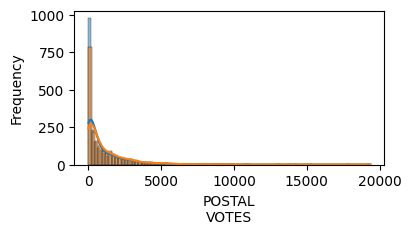

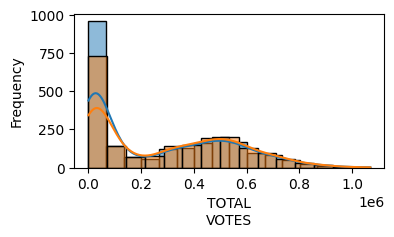

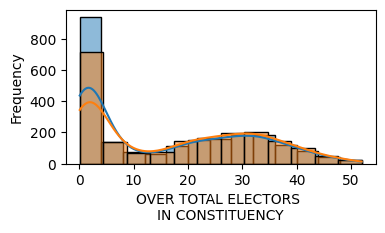

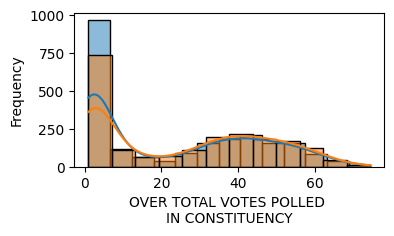

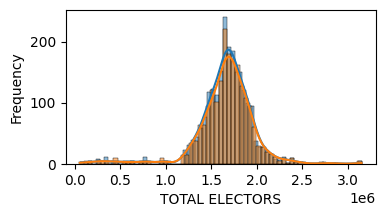

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_attributes = [
    column for column in df.columns if pd.api.types.is_numeric_dtype(df[column])]


for column in numerical_attributes:
    plt.figure(figsize=(4, 2))
    sns.histplot(data=df, x=column, kde=True)
    sns.histplot(data=df_new, x=column, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [307]:
df_new.isnull().mean()

STATE                                        0.0
CONSTITUENCY                                 0.0
NAME                                         0.0
WINNER                                       0.0
PARTY                                        0.0
SYMBOL                                       0.0
GENDER                                       0.0
CRIMINAL\nCASES                              0.0
AGE                                          0.0
CATEGORY                                     0.0
EDUCATION                                    0.0
ASSETS                                       0.0
LIABILITIES                                  0.0
GENERAL\nVOTES                               0.0
POSTAL\nVOTES                                0.0
TOTAL\nVOTES                                 0.0
OVER TOTAL ELECTORS \nIN CONSTITUENCY        0.0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    0.0
TOTAL ELECTORS                               0.0
dtype: float64

converting EDUCATION, ASSETS and LIABILITIES into numerical data

In [308]:
character_to_split = '\n'
df_new['ASSETS'] = df_new['ASSETS'].str.split(character_to_split).str[0]
df_new['LIABILITIES'] = df_new['LIABILITIES'].str.split(character_to_split).str[0]
df_new["ASSETS"] = pd.to_numeric(df_new["ASSETS"].str.replace("Rs ", "").str.replace(",", "").str.strip(), errors="coerce")
df_new["LIABILITIES"] = pd.to_numeric(df_new["LIABILITIES"].str.replace("Rs ", "").str.replace(",", "").str.strip(), errors="coerce")
df_new

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22080\3008054932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ASSETS'] = df_new['ASSETS'].str.split(character_to_split).str[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22080\3008054932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['LIABILITIES'] = df_new['LIABILITIES'].str.split(character_to_split).str[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22080\3008054932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3.099414e+06,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,1.847789e+07,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,3.649100e+07,15300000.0,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,7.427404e+07,8606522.0,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,1.337844e+08,22251891.0,434199,1130,435329,22.466390,37.999125,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,YAVATMAL-WASHIM,Vaishali Sudhakar Yede,0,PHJSP,Whistle,FEMALE,0,28.0,GENERAL,10th Pass,1.168500e+06,9000.0,20563,57,20620,1.076097,1.755157,1916185
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,4.890000e+06,1020000.0,14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,1.287852e+09,11535000.0,434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,9.036630e+08,0.0,427900,115,428015,28.559732,40.977823,1498666


Handling missing values using different imputations

In [ ]:
df_new.columns = df_new.columns.str.replace('\n', ' ', regex=True).str.strip()


In [310]:
df_new.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES',
       'OVER TOTAL ELECTORS  IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED  IN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22080\2395193488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["CRIMINAL CASES"] = pd.to_numeric(df_new["CRIMINAL CASES"],errors='coerce')


mean value: 1.4699398797595191
median value: 0.0
mode value: 0    0.0
Name: CRIMINAL CASES, dtype: float64


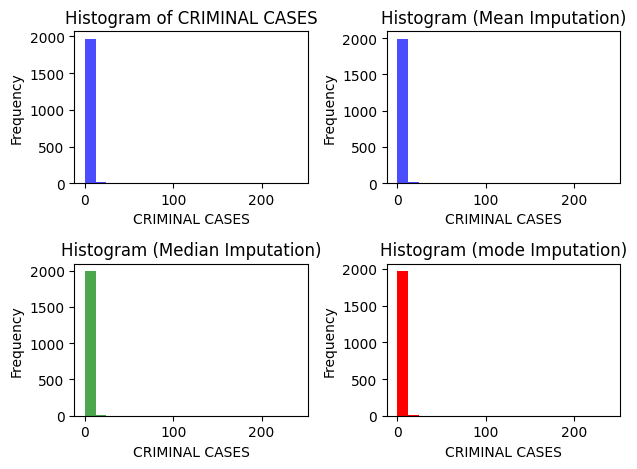

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_new["CRIMINAL CASES"] = pd.to_numeric(df_new["CRIMINAL CASES"],errors='coerce')

mean_value = df_new["CRIMINAL CASES"].mean()
median_value = df_new["CRIMINAL CASES"].median()
mode_value=df_new["CRIMINAL CASES"].mode()

print("mean value: "+str(mean_value))
print("median value: "+str(median_value))
print("mode value: "+str(mode_value))
 
df_mean_imputed = df_new["CRIMINAL CASES"].fillna(mean_value)

df_median_imputed = df_new["CRIMINAL CASES"].fillna(median_value)

df_mode_imputed = df_new["CRIMINAL CASES"].fillna(mode_value)

plt.subplot(2,2,1)
plt.hist(df_new["CRIMINAL CASES"], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of CRIMINAL CASES')
plt.xlabel('CRIMINAL CASES')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df_mean_imputed, bins=20, color='blue', alpha=0.7)
plt.title('Histogram (Mean Imputation)')
plt.xlabel('CRIMINAL CASES')
plt.ylabel('Frequency')


plt.subplot(2, 2, 3)
plt.hist(df_median_imputed, bins=20, color='green', alpha=0.7)
plt.title('Histogram (Median Imputation)')
plt.xlabel('CRIMINAL CASES')
plt.ylabel('Frequency')


plt.subplot(2, 2, 4)
plt.hist(df_mode_imputed, bins=20, color='red')
plt.title('Histogram (mode Imputation)')
plt.xlabel('CRIMINAL CASES')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


mean value: 133302359.65411647
median value: 24622912.5
mode value: 47000.0


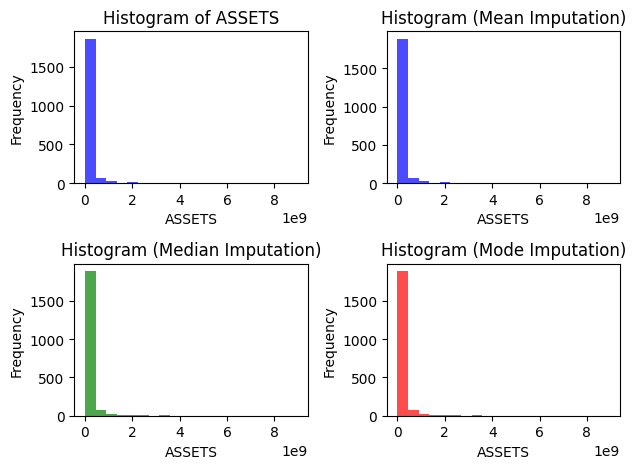

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


mean_value = df_new["ASSETS"].mean()
median_value = df_new["ASSETS"].median()
mode_value = df_new["ASSETS"].mode().iloc[0]

print("mean value: " + str(mean_value))
print("median value: " + str(median_value))
print("mode value: " + str(mode_value))

df_mean_imputed = df_new["ASSETS"].fillna(mean_value)

df_median_imputed = df_new["ASSETS"].fillna(median_value)

df_mode_imputed = df_new["ASSETS"].fillna(mode_value)

plt.subplot(2, 2, 1)
plt.hist(df_new["ASSETS"], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of ASSETS')
plt.xlabel('ASSETS')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df_mean_imputed, bins=20, color='blue', alpha=0.7)
plt.title('Histogram (Mean Imputation)')
plt.xlabel('ASSETS')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df_median_imputed, bins=20, color='green', alpha=0.7)
plt.title('Histogram (Median Imputation)')
plt.xlabel('ASSETS')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df_mode_imputed, bins=20, color='red', alpha=0.7)
plt.title('Histogram (Mode Imputation)')
plt.xlabel('ASSETS')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Mean value: 19966159.63659148
Median value: 953336.0
Mode value: 0    0.0
Name: LIABILITIES, dtype: float64


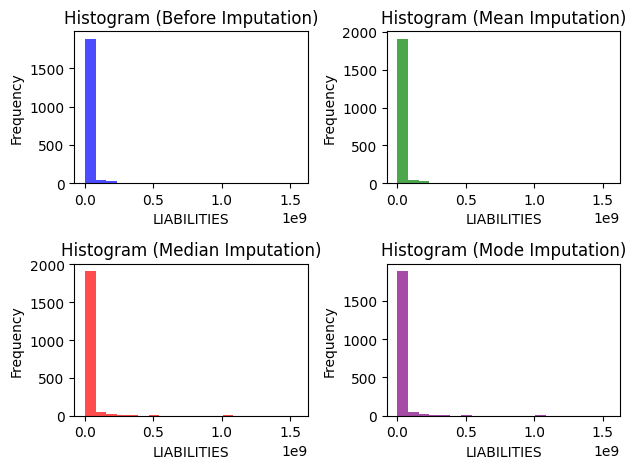

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

mean_value = df_new["LIABILITIES"].mean()
median_value = df_new["LIABILITIES"].median()
mode_value = df_new["LIABILITIES"].mode()

print("Mean value: " + str(mean_value))
print("Median value: " + str(median_value))
print("Mode value: " + str(mode_value))

df_mean_imputed = df_new["LIABILITIES"].fillna(mean_value)

df_median_imputed = df_new["LIABILITIES"].fillna(median_value)

df_mode_imputed = df_new["LIABILITIES"].fillna(mode_value)


plt.subplot(2, 2, 1)
plt.hist(df_new["LIABILITIES"], bins=20, color='blue', alpha=0.7)
plt.title('Histogram (Before Imputation)')
plt.xlabel('LIABILITIES')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df_mean_imputed, bins=20, color='green', alpha=0.7)
plt.title('Histogram (Mean Imputation)')
plt.xlabel('LIABILITIES')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df_median_imputed, bins=20, color='red', alpha=0.7)
plt.title('Histogram (Median Imputation)')
plt.xlabel('LIABILITIES')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df_mode_imputed, bins=20, color='purple', alpha=0.7)
plt.title('Histogram (Mode Imputation)')
plt.xlabel('LIABILITIES')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Encoding Categorical Data

1)LABEL ENCODING for states and constituency

In [314]:
label_encoder = LabelEncoder()
df_new['state_label'] = label_encoder.fit_transform(df_new['STATE'])
df_new['constituency_label'] = label_encoder.fit_transform(df_new['CONSTITUENCY'])
column_order = ['STATE', 'state_label',"CONSTITUENCY","constituency_label"] + [col for col in df_new.columns if col not in ['STATE', 'state_label',"CONSTITUENCY","constituency_label"]]
df_new = df_new[column_order]
df_new

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22080\3013071710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['state_label'] = label_encoder.fit_transform(df_new['STATE'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22080\3013071710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['constituency_label'] = label_encoder.fit_transform(df_new['CONSTITUENCY'])


,STATE,state_label,CONSTITUENCY,constituency_label,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,...,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,31,ADILABAD,0,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,...,ST,12th Pass,3.099414e+06,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,31,ADILABAD,0,Godam Nagesh,0,TRS,Car,MALE,0.0,...,ST,Post Graduate,1.847789e+07,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,31,ADILABAD,0,RATHOD RAMESH,0,INC,Hand,MALE,3.0,...,ST,12th Pass,3.649100e+07,15300000.0,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,33,AGRA,1,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,...,SC,Doctorate,7.427404e+07,8606522.0,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,33,AGRA,1,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.0,...,SC,Post Graduate,1.337844e+08,22251891.0,434199,1130,435329,22.466390,37.999125,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,19,YAVATMAL-WASHIM,537,Vaishali Sudhakar Yede,0,PHJSP,Whistle,FEMALE,0.0,...,GENERAL,10th Pass,1.168500e+06,9000.0,20563,57,20620,1.076097,1.755157,1916185
2258,Maharashtra,19,YAVATMAL-WASHIM,537,Anil Jayram Rathod,0,IND,SHIP,MALE,0.0,...,GENERAL,Post Graduate,4.890000e+06,1020000.0,14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,31,ZAHIRABAD,538,B.B.PATIL,1,TRS,Car,MALE,18.0,...,GENERAL,Graduate,1.287852e+09,11535000.0,434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,31,ZAHIRABAD,538,MADAN MOHAN RAO,0,INC,Hand,MALE,0.0,...,GENERAL,Post Graduate,9.036630e+08,0.0,427900,115,428015,28.559732,40.977823,1498666


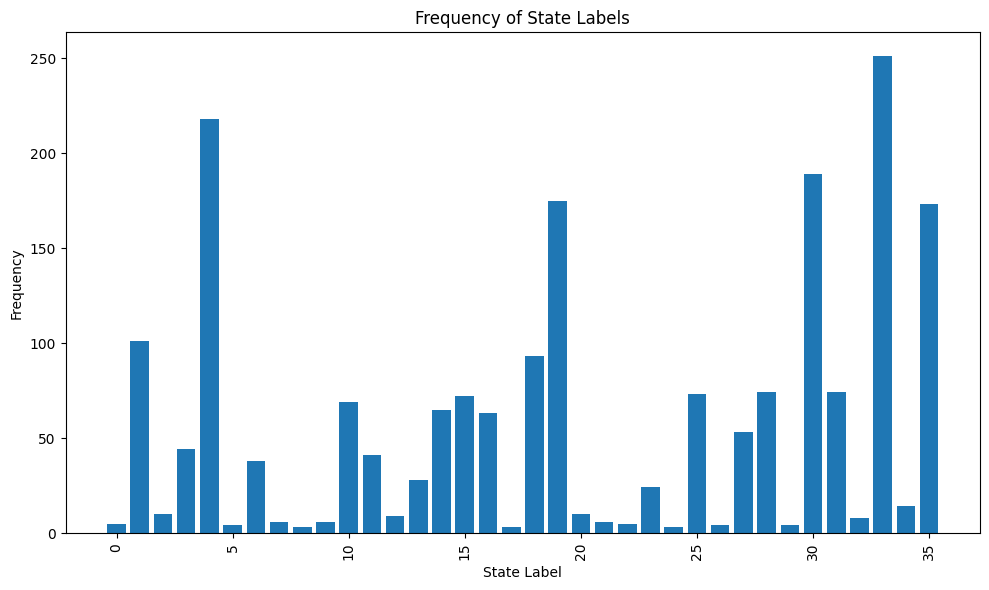

In [ ]:
import matplotlib.pyplot as plt

state_label_counts = df_new['state_label'].value_counts()

state_labels = state_label_counts.index
frequencies = state_label_counts.values

plt.figure(figsize=(10, 6))
plt.bar(state_labels, frequencies)
plt.xlabel('State Label')
plt.ylabel('Frequency')
plt.title('Frequency of State Labels')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()


FREQUENCY ENCODING for party

In [316]:
party_frequency = df_new['PARTY'].value_counts(normalize=True)
df_new['PARTY NAME'] = df_new['PARTY']
df_new['PARTY'] = df_new['PARTY'].map(party_frequency)
df_new

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22080\1797440100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['PARTY NAME'] = df_new['PARTY']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22080\1797440100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['PARTY'] = df_new['PARTY'].map(party_frequency)


,STATE,state_label,CONSTITUENCY,constituency_label,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,...,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,PARTY NAME
0,Telangana,31,ADILABAD,0,SOYAM BAPU RAO,1,0.208127,Lotus,MALE,52.0,...,12th Pass,3.099414e+06,231450.0,376892,482,377374,25.330684,35.468248,1489790,BJP
1,Telangana,31,ADILABAD,0,Godam Nagesh,0,0.008424,Car,MALE,0.0,...,Post Graduate,1.847789e+07,847000.0,318665,149,318814,21.399929,29.964370,1489790,TRS
2,Telangana,31,ADILABAD,0,RATHOD RAMESH,0,0.204658,Hand,MALE,3.0,...,12th Pass,3.649100e+07,15300000.0,314057,181,314238,21.092771,29.534285,1489790,INC
4,Uttar Pradesh,33,AGRA,1,Satyapal Singh Baghel,1,0.208127,Lotus,MALE,5.0,...,Doctorate,7.427404e+07,8606522.0,644459,2416,646875,33.383823,56.464615,1937690,BJP
5,Uttar Pradesh,33,AGRA,1,Manoj Kumar Soni,0,0.080773,Elephant,MALE,0.0,...,Post Graduate,1.337844e+08,22251891.0,434199,1130,435329,22.466390,37.999125,1937690,BSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,19,YAVATMAL-WASHIM,537,Vaishali Sudhakar Yede,0,0.000496,Whistle,FEMALE,0.0,...,10th Pass,1.168500e+06,9000.0,20563,57,20620,1.076097,1.755157,1916185,PHJSP
2258,Maharashtra,19,YAVATMAL-WASHIM,537,Anil Jayram Rathod,0,0.099604,SHIP,MALE,0.0,...,Post Graduate,4.890000e+06,1020000.0,14661,25,14686,0.766419,1.250060,1916185,IND
2259,Telangana,31,ZAHIRABAD,538,B.B.PATIL,1,0.008424,Car,MALE,18.0,...,Graduate,1.287852e+09,11535000.0,434066,178,434244,28.975369,41.574183,1498666,TRS
2260,Telangana,31,ZAHIRABAD,538,MADAN MOHAN RAO,0,0.204658,Hand,MALE,0.0,...,Post Graduate,9.036630e+08,0.0,427900,115,428015,28.559732,40.977823,1498666,INC


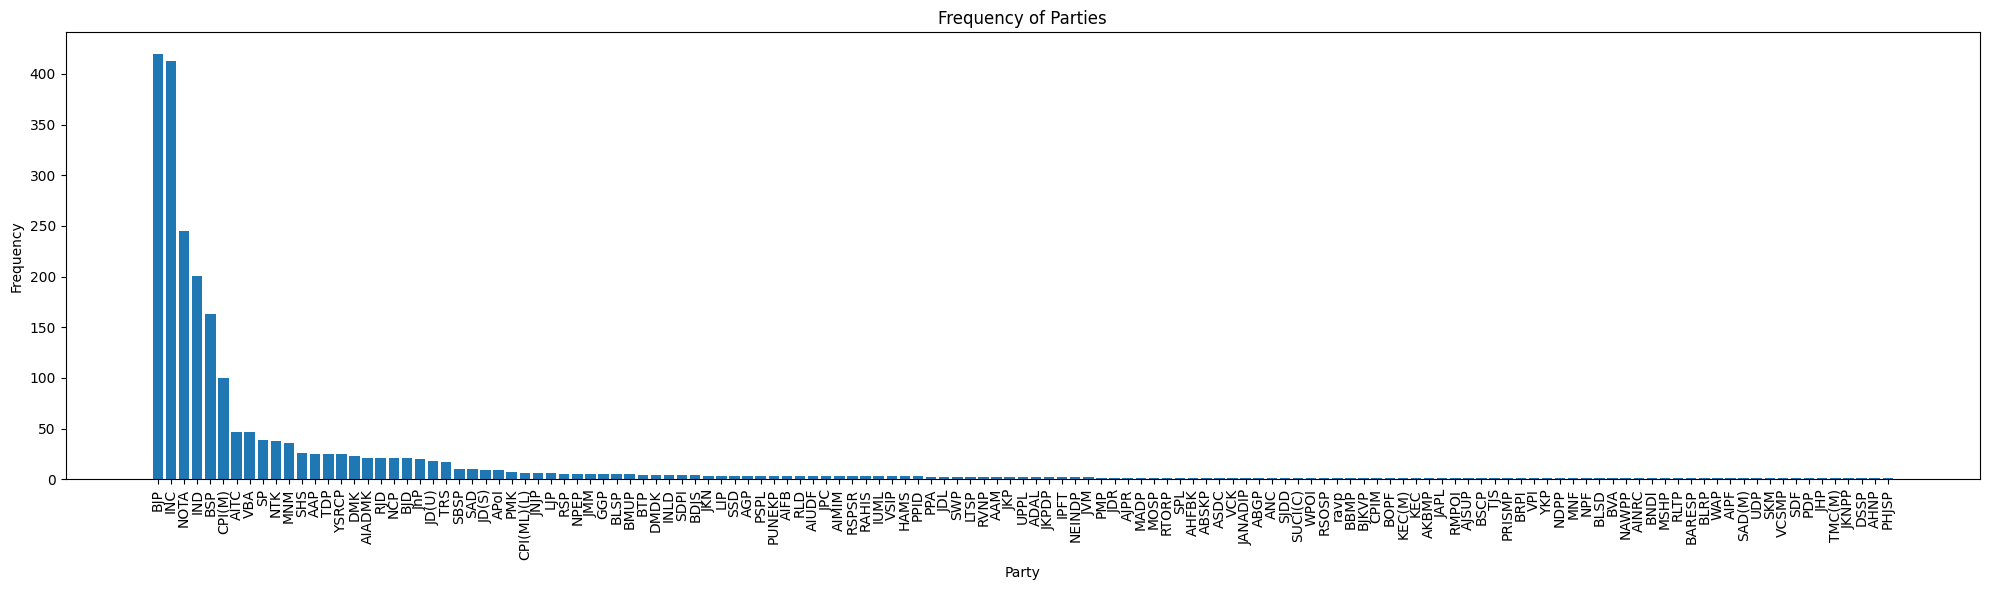

In [339]:
import matplotlib.pyplot as plt


state_label_counts = df['PARTY'].value_counts()

state_labels = state_label_counts.index
frequencies = state_label_counts.values

plt.figure(figsize=(20, 6))
plt.bar(state_labels, frequencies)
plt.xlabel('Party')
plt.ylabel('Frequency')
plt.title('Frequency of Parties')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


ONE HOT ENCODING for catergory, and dropping symbol

In [318]:
df_new = pd.get_dummies(df_new, columns=['CATEGORY'], prefix=['CATEGORY'],drop_first=True)
df_new=df_new.drop("SYMBOL",axis=1)
df_new

,STATE,state_label,CONSTITUENCY,constituency_label,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,...,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,PARTY NAME,CATEGORY_SC,CATEGORY_ST
0,Telangana,31,ADILABAD,0,SOYAM BAPU RAO,1,0.208127,MALE,52.0,52.0,...,231450.0,376892,482,377374,25.330684,35.468248,1489790,BJP,False,True
1,Telangana,31,ADILABAD,0,Godam Nagesh,0,0.008424,MALE,0.0,54.0,...,847000.0,318665,149,318814,21.399929,29.964370,1489790,TRS,False,True
2,Telangana,31,ADILABAD,0,RATHOD RAMESH,0,0.204658,MALE,3.0,52.0,...,15300000.0,314057,181,314238,21.092771,29.534285,1489790,INC,False,True
4,Uttar Pradesh,33,AGRA,1,Satyapal Singh Baghel,1,0.208127,MALE,5.0,58.0,...,8606522.0,644459,2416,646875,33.383823,56.464615,1937690,BJP,True,False
5,Uttar Pradesh,33,AGRA,1,Manoj Kumar Soni,0,0.080773,MALE,0.0,47.0,...,22251891.0,434199,1130,435329,22.466390,37.999125,1937690,BSP,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,19,YAVATMAL-WASHIM,537,Vaishali Sudhakar Yede,0,0.000496,FEMALE,0.0,28.0,...,9000.0,20563,57,20620,1.076097,1.755157,1916185,PHJSP,False,False
2258,Maharashtra,19,YAVATMAL-WASHIM,537,Anil Jayram Rathod,0,0.099604,MALE,0.0,43.0,...,1020000.0,14661,25,14686,0.766419,1.250060,1916185,IND,False,False
2259,Telangana,31,ZAHIRABAD,538,B.B.PATIL,1,0.008424,MALE,18.0,63.0,...,11535000.0,434066,178,434244,28.975369,41.574183,1498666,TRS,False,False
2260,Telangana,31,ZAHIRABAD,538,MADAN MOHAN RAO,0,0.204658,MALE,0.0,49.0,...,0.0,427900,115,428015,28.559732,40.977823,1498666,INC,False,False


ORDINAL ENCODING for education column and gender

In [319]:
distinct_values = df_new['EDUCATION'].unique()
distinct_values

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available', 'Post Graduate\n'],
      dtype=object)

In [ ]:
df_new['EDUCATION'] = df_new['EDUCATION'].str.strip().str.replace('\n', '', regex=True)

df_new['EDUCATION'] = df_new['EDUCATION'].replace({
    'Others': 'Other',
    'Not Available': 'Missing'
})

df_new['EDUCATION'] = df_new['EDUCATION'].fillna('Missing')

education_mapping = {
    'Illiterate': 1,
    'Literate': 2,
    '5th Pass': 3,
    '8th Pass': 4,
    '10th Pass': 5,
    '12th Pass': 6,
    'Graduate': 7,
    'Graduate Professional': 8,
    'Post Graduate': 9,
    'Doctorate': 10,
    'Other': 11,
    'Missing': 12
}

df_new['EDUCATION_ORDERED'] = df_new['EDUCATION'].map(education_mapping).astype(int)
df_new

,STATE,state_label,CONSTITUENCY,constituency_label,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,...,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,PARTY NAME,CATEGORY_SC,CATEGORY_ST,EDUCATION_ORDERED
0,Telangana,31,ADILABAD,0,SOYAM BAPU RAO,1,0.208127,MALE,52.0,52.0,...,376892,482,377374,25.330684,35.468248,1489790,BJP,False,True,6
1,Telangana,31,ADILABAD,0,Godam Nagesh,0,0.008424,MALE,0.0,54.0,...,318665,149,318814,21.399929,29.964370,1489790,TRS,False,True,9
2,Telangana,31,ADILABAD,0,RATHOD RAMESH,0,0.204658,MALE,3.0,52.0,...,314057,181,314238,21.092771,29.534285,1489790,INC,False,True,6
4,Uttar Pradesh,33,AGRA,1,Satyapal Singh Baghel,1,0.208127,MALE,5.0,58.0,...,644459,2416,646875,33.383823,56.464615,1937690,BJP,True,False,10
5,Uttar Pradesh,33,AGRA,1,Manoj Kumar Soni,0,0.080773,MALE,0.0,47.0,...,434199,1130,435329,22.466390,37.999125,1937690,BSP,True,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,19,YAVATMAL-WASHIM,537,Vaishali Sudhakar Yede,0,0.000496,FEMALE,0.0,28.0,...,20563,57,20620,1.076097,1.755157,1916185,PHJSP,False,False,5
2258,Maharashtra,19,YAVATMAL-WASHIM,537,Anil Jayram Rathod,0,0.099604,MALE,0.0,43.0,...,14661,25,14686,0.766419,1.250060,1916185,IND,False,False,9
2259,Telangana,31,ZAHIRABAD,538,B.B.PATIL,1,0.008424,MALE,18.0,63.0,...,434066,178,434244,28.975369,41.574183,1498666,TRS,False,False,7
2260,Telangana,31,ZAHIRABAD,538,MADAN MOHAN RAO,0,0.204658,MALE,0.0,49.0,...,427900,115,428015,28.559732,40.977823,1498666,INC,False,False,9


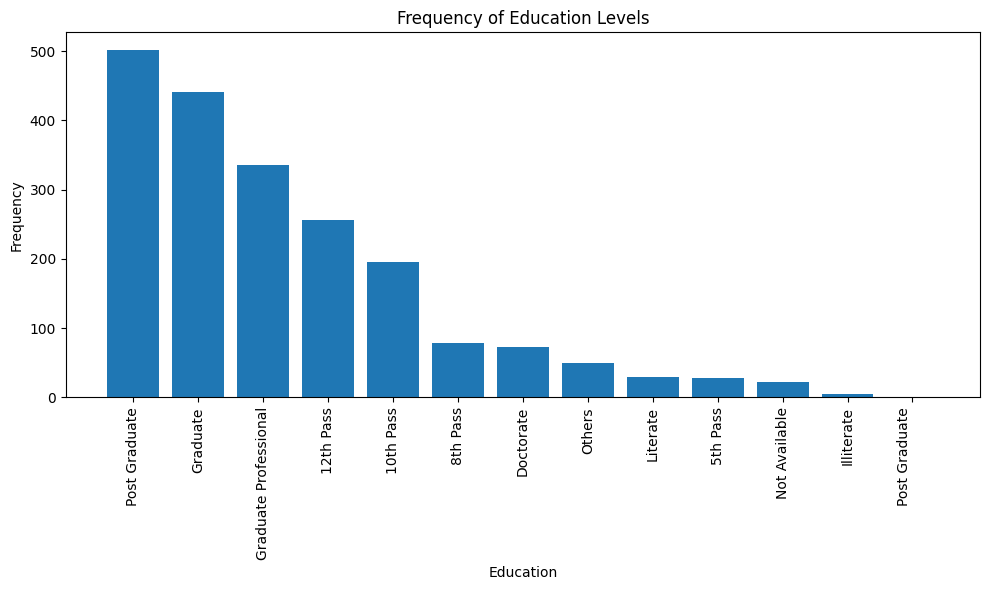

In [ ]:
import matplotlib.pyplot as plt

state_label_counts = df['EDUCATION'].value_counts()

state_labels = state_label_counts.index
frequencies = state_label_counts.values

plt.figure(figsize=(10, 6))
plt.bar(state_labels, frequencies)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Frequency of Education Levels')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

In [322]:
gender_mapping = {
    "MALE":1,
    "fEMALE":2
}
df_new['GENDER_LABELED'] = df_new['GENDER'].map(gender_mapping)
df_new

,STATE,state_label,CONSTITUENCY,constituency_label,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,...,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,PARTY NAME,CATEGORY_SC,CATEGORY_ST,EDUCATION_ORDERED,GENDER_LABELED
0,Telangana,31,ADILABAD,0,SOYAM BAPU RAO,1,0.208127,MALE,52.0,52.0,...,482,377374,25.330684,35.468248,1489790,BJP,False,True,6,1.0
1,Telangana,31,ADILABAD,0,Godam Nagesh,0,0.008424,MALE,0.0,54.0,...,149,318814,21.399929,29.964370,1489790,TRS,False,True,9,1.0
2,Telangana,31,ADILABAD,0,RATHOD RAMESH,0,0.204658,MALE,3.0,52.0,...,181,314238,21.092771,29.534285,1489790,INC,False,True,6,1.0
4,Uttar Pradesh,33,AGRA,1,Satyapal Singh Baghel,1,0.208127,MALE,5.0,58.0,...,2416,646875,33.383823,56.464615,1937690,BJP,True,False,10,1.0
5,Uttar Pradesh,33,AGRA,1,Manoj Kumar Soni,0,0.080773,MALE,0.0,47.0,...,1130,435329,22.466390,37.999125,1937690,BSP,True,False,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,19,YAVATMAL-WASHIM,537,Vaishali Sudhakar Yede,0,0.000496,FEMALE,0.0,28.0,...,57,20620,1.076097,1.755157,1916185,PHJSP,False,False,5,NaN
2258,Maharashtra,19,YAVATMAL-WASHIM,537,Anil Jayram Rathod,0,0.099604,MALE,0.0,43.0,...,25,14686,0.766419,1.250060,1916185,IND,False,False,9,1.0
2259,Telangana,31,ZAHIRABAD,538,B.B.PATIL,1,0.008424,MALE,18.0,63.0,...,178,434244,28.975369,41.574183,1498666,TRS,False,False,7,1.0
2260,Telangana,31,ZAHIRABAD,538,MADAN MOHAN RAO,0,0.204658,MALE,0.0,49.0,...,115,428015,28.559732,40.977823,1498666,INC,False,False,9,1.0


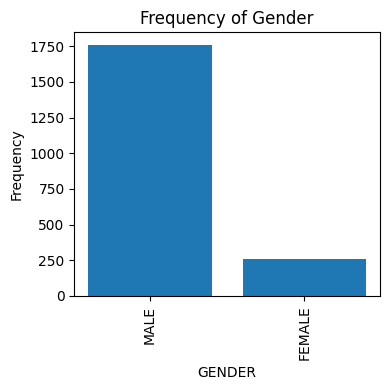

In [ ]:
import matplotlib.pyplot as plt


state_label_counts = df['GENDER'].value_counts()

state_labels = state_label_counts.index
frequencies = state_label_counts.values

plt.figure(figsize=(4, 4))
plt.bar(state_labels, frequencies)
plt.xlabel('GENDER')
plt.ylabel('Frequency')
plt.title('Frequency of Gender')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

DATA DISCRETIZATION

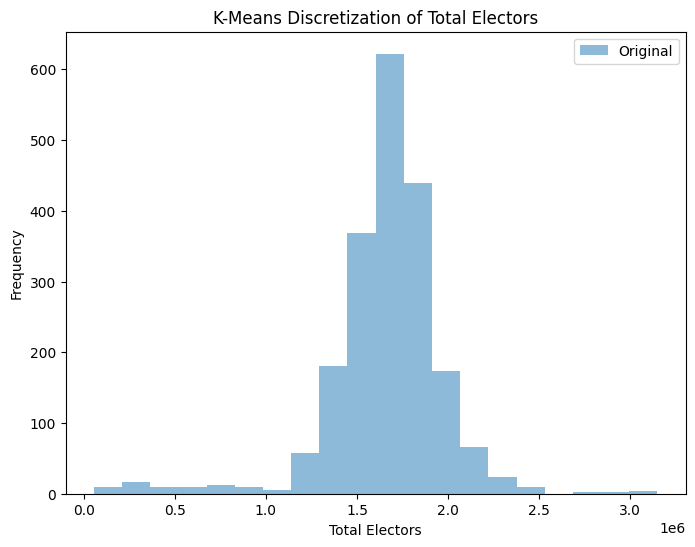

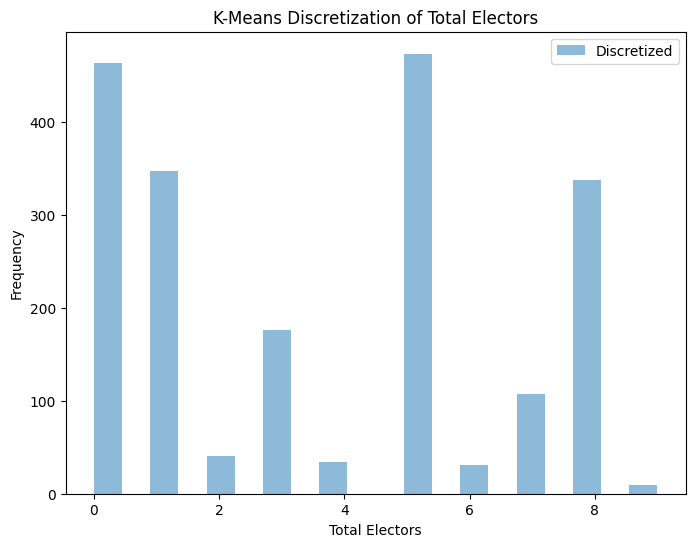

,STATE,state_label,CONSTITUENCY,constituency_label,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,...,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,PARTY NAME,CATEGORY_SC,CATEGORY_ST,EDUCATION_ORDERED,GENDER_LABELED,total_electors_discretized
0,Telangana,31,ADILABAD,0,SOYAM BAPU RAO,1,0.208127,MALE,52.0,52.0,...,377374,25.330684,35.468248,1489790,BJP,False,True,6,1.0,8
1,Telangana,31,ADILABAD,0,Godam Nagesh,0,0.008424,MALE,0.0,54.0,...,318814,21.399929,29.964370,1489790,TRS,False,True,9,1.0,8
2,Telangana,31,ADILABAD,0,RATHOD RAMESH,0,0.204658,MALE,3.0,52.0,...,314238,21.092771,29.534285,1489790,INC,False,True,6,1.0,8
4,Uttar Pradesh,33,AGRA,1,Satyapal Singh Baghel,1,0.208127,MALE,5.0,58.0,...,646875,33.383823,56.464615,1937690,BJP,True,False,10,1.0,1
5,Uttar Pradesh,33,AGRA,1,Manoj Kumar Soni,0,0.080773,MALE,0.0,47.0,...,435329,22.466390,37.999125,1937690,BSP,True,False,9,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,19,YAVATMAL-WASHIM,537,Vaishali Sudhakar Yede,0,0.000496,FEMALE,0.0,28.0,...,20620,1.076097,1.755157,1916185,PHJSP,False,False,5,NaN,1
2258,Maharashtra,19,YAVATMAL-WASHIM,537,Anil Jayram Rathod,0,0.099604,MALE,0.0,43.0,...,14686,0.766419,1.250060,1916185,IND,False,False,9,1.0,1
2259,Telangana,31,ZAHIRABAD,538,B.B.PATIL,1,0.008424,MALE,18.0,63.0,...,434244,28.975369,41.574183,1498666,TRS,False,False,7,1.0,8
2260,Telangana,31,ZAHIRABAD,538,MADAN MOHAN RAO,0,0.204658,MALE,0.0,49.0,...,428015,28.559732,40.977823,1498666,INC,False,False,9,1.0,8


In [ ]:
from sklearn.cluster import KMeans
import numpy as np


total_electors = df_new[['TOTAL ELECTORS']]

n_clusters = 10 

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(total_electors)
df_new['total_electors_discretized'] = kmeans.predict(total_electors)

plt.figure(figsize=(8, 6))
plt.hist(df_new['TOTAL ELECTORS'], bins=20, alpha=0.5, label='Original')
plt.xlabel('Total Electors')
plt.ylabel('Frequency')
plt.title('K-Means Discretization of Total Electors')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df_new['total_electors_discretized'], bins=20, alpha=0.5, label='Discretized')
plt.xlabel('Total Electors')
plt.ylabel('Frequency')
plt.title('K-Means Discretization of Total Electors')
plt.legend()
plt.show()

df_new

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22080\3269955076.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['AGE'].fillna(df_new['AGE'].median(), inplace=True)


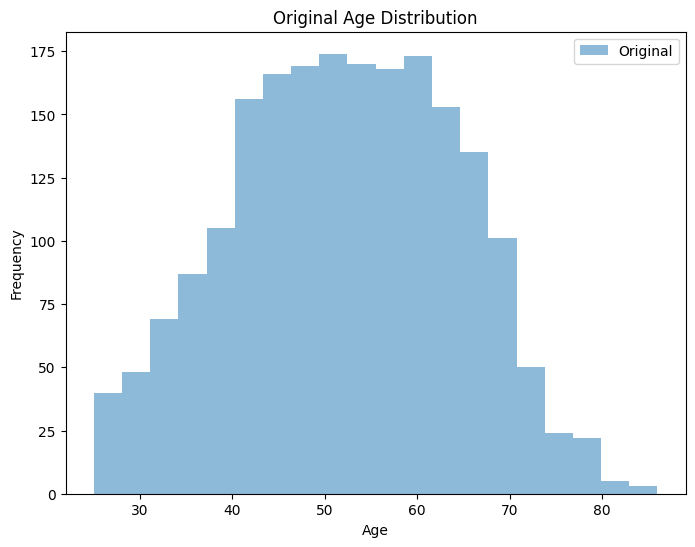

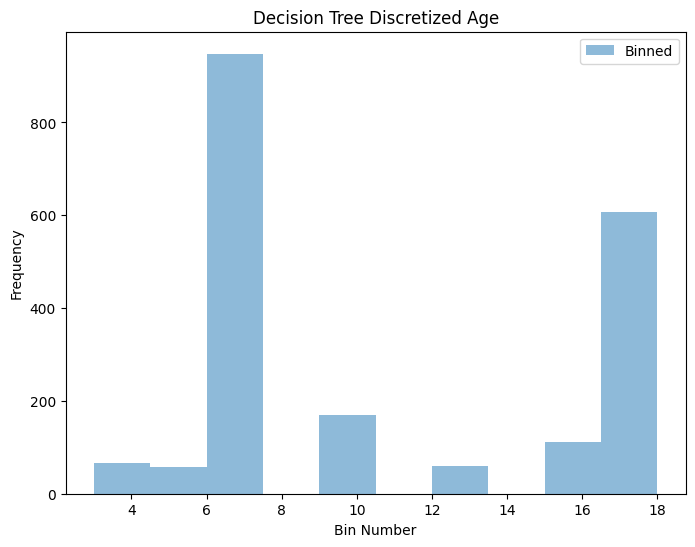

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

df_new['AGE'] = pd.to_numeric(df_new['AGE'], errors='coerce')
df_new.loc[df_new['AGE'] <= 0, 'AGE'] = np.nan
df_new['AGE'].fillna(df_new['AGE'].median(), inplace=True)

age_feature = df_new[['AGE']]

max_leaf_nodes = 10 
decision_tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
decision_tree.fit(age_feature, age_feature)  
df_new['age_bin'] = decision_tree.apply(age_feature)

plt.figure(figsize=(8, 6))
plt.hist(df_new['AGE'], bins=20, alpha=0.5, label='Original')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Original Age Distribution')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df_new['age_bin'], bins=len(df_new['age_bin'].unique()), alpha=0.5, label='Binned')
plt.xlabel('Bin Number')
plt.ylabel('Frequency')
plt.title('Decision Tree Discretized Age')
plt.legend()
plt.show()


In [ ]:
thresholds = decision_tree.tree_.threshold
thresholds = thresholds[thresholds != -2] 
thresholds = sorted(thresholds)

bin_labels = []
previous = float('-inf')
for boundary in thresholds:
    if previous == float('-inf'):
        bin_labels.append(f"Ages <= {int(boundary)}")
    else:
        bin_labels.append(f"Ages {int(previous)+1}–{int(boundary)}")
    previous = boundary
bin_labels.append(f"Ages > {int(previous)}")

for i, label in enumerate(bin_labels):
    print(f"Bin {i}: {label}")


Bin 0: Ages <= 51
Bin 1: Ages 52–52
Bin 2: Ages 53–54
Bin 3: Ages 55–55
Bin 4: Ages 56–56
Bin 5: Ages 57–57
Bin 6: Ages 58–58
Bin 7: Ages 59–59
Bin 8: Ages 60–61
Bin 9: Ages > 61


OUTLIER HANDLING

<Axes: ylabel='AGE'>

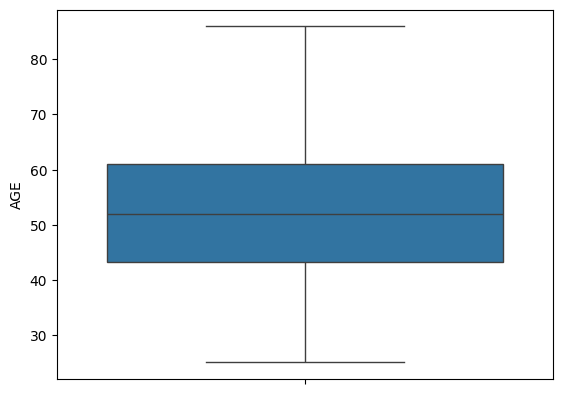

In [327]:
sns.boxplot( y='AGE',data=df_new)


In [328]:
print(df_new.columns.tolist())


['STATE', 'state_label', 'CONSTITUENCY', 'constituency_label', 'NAME', 'WINNER', 'PARTY', 'GENDER', 'CRIMINAL CASES', 'AGE', 'EDUCATION', 'ASSETS', 'LIABILITIES', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES', 'OVER TOTAL ELECTORS  IN CONSTITUENCY', 'OVER TOTAL VOTES POLLED  IN CONSTITUENCY', 'TOTAL ELECTORS', 'PARTY NAME', 'CATEGORY_SC', 'CATEGORY_ST', 'EDUCATION_ORDERED', 'GENDER_LABELED', 'total_electors_discretized', 'age_bin']


<Axes: ylabel='TOTAL VOTES'>

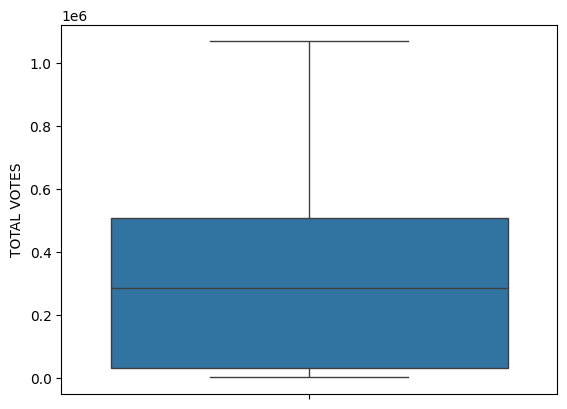

In [329]:
sns.boxplot( y='TOTAL VOTES',data=df_new)

<Axes: ylabel='TOTAL ELECTORS'>

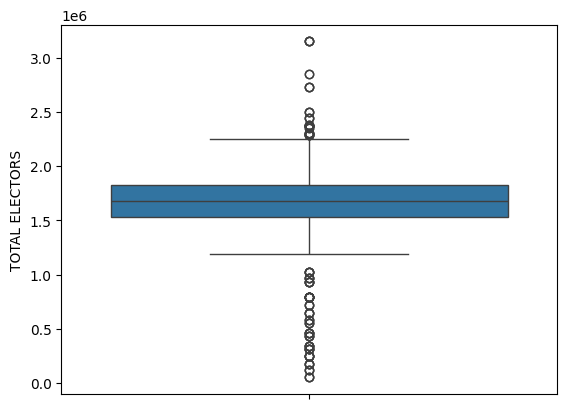

In [330]:
sns.boxplot( y='TOTAL ELECTORS',data=df_new)

Malkajgiri has 31lakh electors, it is an outlier

OUTLIER CAPPING

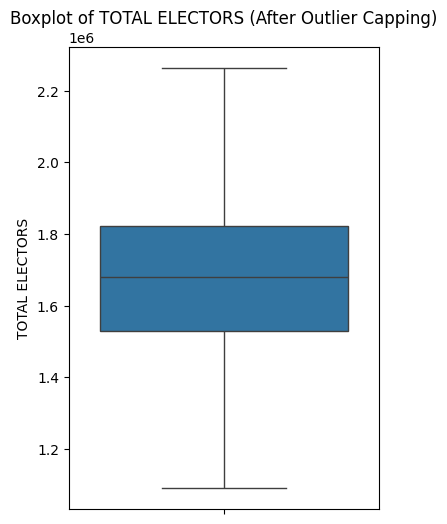

In [331]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
column_name = "TOTAL ELECTORS"

Q1 = df_new[column_name].quantile(0.25)
Q3 = df_new[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_new[column_name] = df_new[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

plt.figure(figsize=(4, 6))
sns.boxplot(y=df_new[column_name], orient="v")
plt.title(f"Boxplot of {column_name} (After Outlier Capping)")
plt.ylabel(column_name)
plt.show()


FEATURE SCALING

1)Feature selection using chi-squared

Selected Features:
                                       Specs         Score
5                                     ASSETS  3.172663e+10
6                                LIABILITIES  9.414698e+09
9                                TOTAL VOTES  2.304589e+08
7                              GENERAL VOTES  2.292337e+08
8                               POSTAL VOTES  1.261312e+06
12                            TOTAL ELECTORS  1.187970e+05
11  OVER TOTAL VOTES POLLED  IN CONSTITUENCY  2.013616e+04
10      OVER TOTAL ELECTORS  IN CONSTITUENCY  1.351904e+04
3                             CRIMINAL CASES  9.648726e+01
1                         constituency_label  7.706853e+01


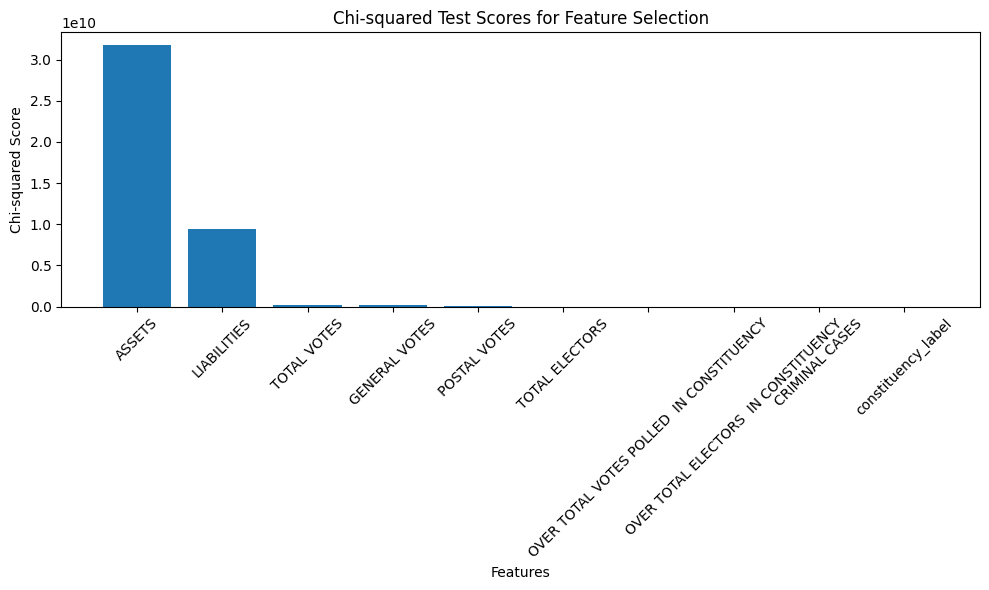

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer


df1 = df_new.copy()

df1 = df1.drop(columns=["WINNER", "STATE", "CONSTITUENCY", "GENDER", "NAME", "EDUCATION", "PARTY NAME"])

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df1)

y = df_new["WINNER"] 

num_features_to_select = 10

bestfeatures = SelectKBest(score_func=chi2, k=num_features_to_select)
fit = bestfeatures.fit(X_imputed, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df1.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores = featureScores.sort_values(by='Score', ascending=False)
selected_features = featureScores.head(num_features_to_select)
print("Selected Features:")
print(selected_features)

plt.figure(figsize=(10, 6))
plt.bar(selected_features['Specs'], selected_features['Score'])
plt.title('Chi-squared Test Scores for Feature Selection')
plt.xlabel('Features')
plt.ylabel('Chi-squared Score')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


2) CORRELATION MATRIX WITH HEATMAP

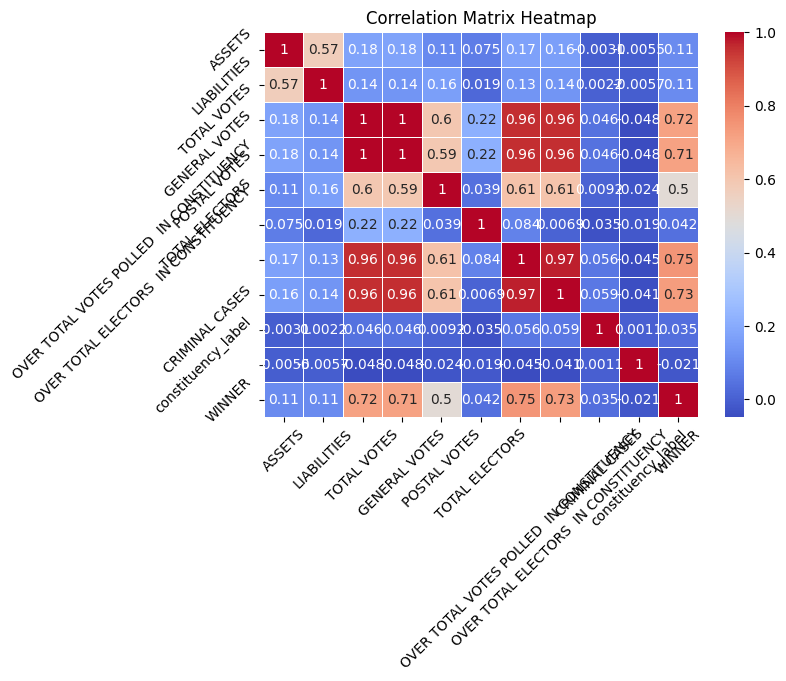

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = selected_features['Specs'].tolist()
selected_columns.append("WINNER")  

df_selected = df_new[selected_columns]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(7, 5))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()


TRANSFORMATION

Z-Score transformation on ASSETS, LIABILITES, TOTAL VOTES, TOTAL ELECTORS

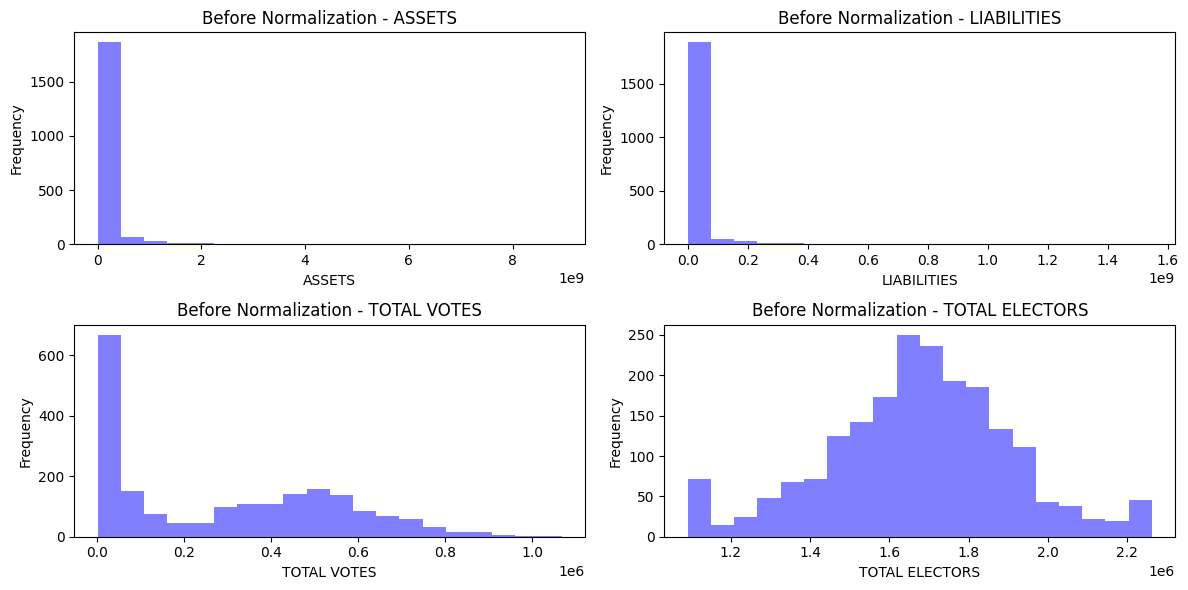

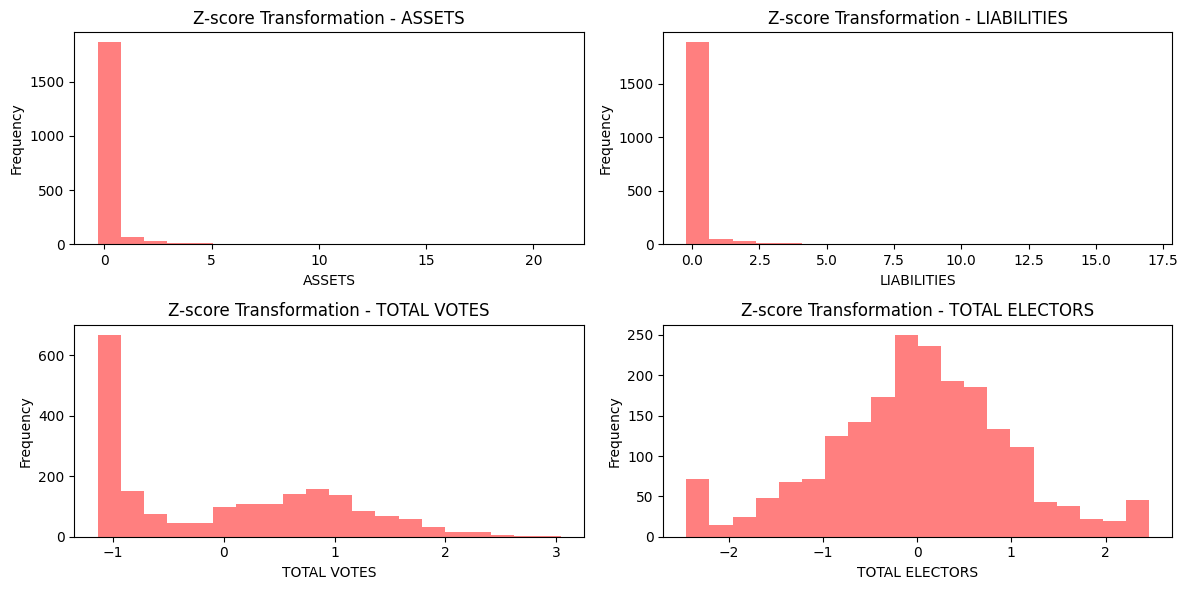

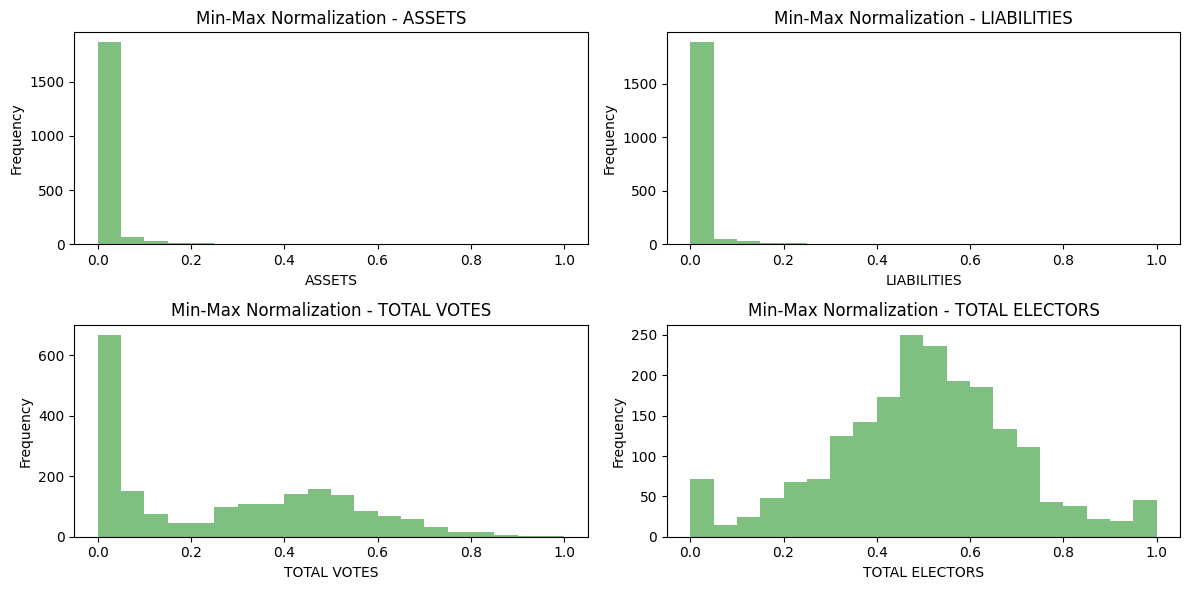

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


columns_to_transform = ["ASSETS", "LIABILITIES", "TOTAL VOTES", "TOTAL ELECTORS"]

zscore_scaler = StandardScaler()
df_new_zscore = df_new.copy()
df_new_zscore[columns_to_transform] = zscore_scaler.fit_transform(df_new_zscore[columns_to_transform])

minmax_scaler = MinMaxScaler()
df_new_minmax = df_new.copy()
df_new_minmax[columns_to_transform] = minmax_scaler.fit_transform(df_new_minmax[columns_to_transform])

plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_transform):
    plt.subplot(2, 2, i + 1)
    plt.hist(df_new[column], bins=20, alpha=0.5, color='b')
    plt.title(f'Before Normalization - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_transform):
    plt.subplot(2, 2, i + 1)
    plt.hist(df_new_zscore[column], bins=20, alpha=0.5, color='r')
    plt.title(f'Z-score Transformation - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_transform):
    plt.subplot(2, 2, i + 1)
    plt.hist(df_new_minmax[column], bins=20, alpha=0.5, color='g')
    plt.title(f'Min-Max Normalization - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

